# 순방향 연산

In [ ]:
import numpy as np

X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

In [ ]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [ ]:
X.shape

(4, 3)

In [ ]:
# 활성화 함수 sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [ ]:
# 가중치(지금은 랜덤하게 선택하는 걸로, 원래는 학습이 완료된 가중치를 사용해야함)
# 음수에서부터 양수까지 다양한 값을 가지게 하기 위해 2를 곱하고 1을 빼주었음
W = 2 * np.random.random((1, 3)) -1
W

array([[-0.83944592, -0.35681427, -0.96715766]])

In [ ]:
X[0, :] , X[0, :].T

(array([0, 0, 1]), array([0, 0, 1]))

In [ ]:
X[0, :].shape , X[0, :].T.shape

((3,), (3,))

In [ ]:
# 추론(순방향 연산)
N = 4

for k in range(N):
    x = X[k, :].T
    v = np.matmul(W, x)
    y = sigmoid(v)

    print(y)

[0.2754474]
[0.21015823]
[0.14104911]
[0.10308402]


이렇듯 순방향 연산은 데이터에 가중치와 편향을 주고 활성화함수를 거쳐 출력값을 얻는 흐름을 말한다.

위에서는 가중치를 랜덤하게 설정했는데 실제로는 학습된 가중치를 주어야한다. 학습을 시키기 위해 정답지를 주고 학습된 가중치를 얻어보자.

In [ ]:
# 정답지
D = np.array([
    [0], [0], [1], [1]
])

In [ ]:
D , D.shape

(array([[0],
        [0],
        [1],
        [1]]),
 (4, 1))

가중치를 어떻게 학습시킬 수 있을까?

우리는 이제 정답지를 알고 있으므로 출력값과 정답지와의 오차를 구해 그 오차가 작아지도록 하는 가중치를 구하면 된다.

In [ ]:
# 출력값 계산
def calc_output(W, x):
    v = np.matmul(W, x)
    y = sigmoid(v)
    return y

# 오차 계산
def calc_error(d, y_pred): #(참값,예측값)
    e = d - y_pred
    delta = y_pred * (1 - y_pred) * e # 에러와 활성화함수의 미분값 , 오차와 활성화 함수의 미분값으로 미분값이 있어야 방향을 잡을 수 있음

    return delta

오차를 계산하는 calc_error 함수에서 정답지와 출력값의 차이인 e는 알겠는데 delta는 무엇일까?

In [ ]:
# 시그모이드 함수의 미분 형태
import sympy as sym

z = sym.Symbol('z')
s = 1 / (1 + sym.exp(-z)) # 시그모이드 함수 형태
sym.diff(s) # 시그모이드 함수 미분 형태

exp(-z)/(1 + exp(-z))**2

시그모이드 함수의 미분 형태를 조금 변형시키면 s * (1 - s) 의 형태가 나온다.

즉 delta의 y_pred * (1 - y_pred) * e 중 y_pred * (1 - y_pred)는 e의 미분값임을 알 수 있다. 오차를 뒤로 뒤로 전해줄 때 단순히 차이만 계산하는 것이 아닌 미분값을 같이 곱해서 넘겨주는 것이다.

In [ ]:
# 한 epoch에 수행되는 W 계산(gradient descent)
def delta_GD(W, X, D, alpha):
    # 모든 데이터에 대해 계산하는 gradient descent 방식에 따라
    # 전체 데이터 개수인 4개를 다 거쳐야함
    for k in range(4):  # 데이터가 4개라서
        x = X[k, :].T # 입력값
        d = D[k] # 실제값(정답지)

        y_pred = calc_output(W, x) # 순방향 추론
        delta = calc_error(d , y_pred) # delta 계산
        dW = alpha * delta * x # 가중치 변화량 , alpha = learning rate
        W = W + dW # 가중치 업데이트
    return W

In [ ]:
W

array([[-0.83944592, -0.35681427, -0.96715766]])

In [ ]:
# 기존 가중치를 학습을 통해 업데이트 시켜보자
alpha = 0.9
for epoch in range(1000):
    W = delta_GD(W, X, D, alpha)
    print(W)

[[-0.67173496 -0.30782289 -0.87824367]]
[[-0.47394157 -0.24772268 -0.77035615]]
[[-0.24277872 -0.17664213 -0.64397889]]
[[ 0.01607938 -0.1009038  -0.50912194]]
[[ 0.28156918 -0.0355442  -0.38977859]]
[[ 0.5267311   0.00518136 -0.31106449]]
[[ 0.73906553  0.02020879 -0.27847077]]
[[ 0.92137813  0.01725148 -0.28122988]]
[[ 1.08075841  0.00409534 -0.30635602]]
[[ 1.22315578 -0.01396269 -0.3442471 ]]
[[ 1.35265512 -0.03374641 -0.3887598 ]]
[[ 1.47195001 -0.05347155 -0.43617309]]
[[ 1.58284394 -0.07220382 -0.48430276]]
[[ 1.68659221 -0.08951028 -0.5319054 ]]
[[ 1.78411158 -0.10524395 -0.57830275]]
[[ 1.87610479 -0.11941383 -0.62315119]]
[[ 1.9631341  -0.13210826 -0.66630256]]
[[ 2.04566527 -0.14345081 -0.70772079]]
[[ 2.12409443 -0.15357577 -0.74743258]]
[[ 2.19876499 -0.16261504 -0.78549823]]
[[ 2.26997875 -0.17069181 -0.82199468]]
[[ 2.33800352 -0.1779178  -0.85700556]]
[[ 2.40307867 -0.18439265 -0.89061562]]
[[ 2.46541921 -0.19020432 -0.92290757]]
[[ 2.52521913 -0.19542998 -0.95396041]]


In [ ]:
W # 학습된 가중치 ,가중치가 수렴하면서 확정됨

array([[ 7.14727733, -0.22085531, -3.35505985]])

In [ ]:
calc_output(W, X.T) # 학습된 가중치로 얻어낸 예측값

array([[0.03372986, 0.0272277 , 0.97795154, 0.97265145]])

실제값인 0, 0, 1, 1에 근사한 값이 도출된 것을 볼 수 있다.

# 역전파

XOR 문제를 통해 실습해보자

In [ ]:
# 데이터 준비
import numpy as np

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]]) # 마지막 1은 상수항
D = np.array([[0], [1], [1], [0]])

W = 2 * np.random.random((1, 3)) -1
W

array([[ 0.3505086 , -0.96122829,  0.39128292]])

In [ ]:
# 학습을 통한 가중치 업데이트
alpha = 0.9
for epoch in range(1000):
    W = delta_GD(W, X, D, alpha)
    #print(W)

In [ ]:
# 학습된 결과를 통해 예측된 값
calc_output(W, X.T)

array([[0.52965337, 0.5       , 0.47034663, 0.44090112]])

예측이 생각보다 잘 된것 같지 않다. 역전파를 이용해 다시 계산해보자.

In [ ]:
def calc_output(W1, W2, x):
    # W1 (4, 3)
    # x = X[k, :].T (3, )
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1) # (4, )
    # W2 (1, 4)
    v = np.matmul(W2, y1)
    y = sigmoid(v) # (1, )

    # print('y : ', y.shape) # (1, )
    # print('y1 : ', y1.shape) # (4, )
    return y, y1

# 출력층 델타 계산
def calc_delta(d, y):
    e = d - y
    delta = y*(1-y)*e
    # print('delta : ', delta.shape) # (1, )
    return delta

# 은닉층 델타 계산
def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta) #d가 가중치 w2와 곱해져서 뒤로 넘어감
    delta1 = y1*(1-y1)*e1
    # print('delta1 : ', delta1.shape) # (4,)
    return delta1

# 역전파를 이용한 가중치 업데이트 계산 함수
def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T #(3, )
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)

        # alpha : 상수 /  delta1 : (4 , ) / x : (3 , )
        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        # alpha : 상수 /  delta : (1 , ) / y1 : (4, )
        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [ ]:
# 가중치를 랜덤하게 초기화하고 다시 학습시켜보자.
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
D = np.array([[0], [1], [1], [0]])

W1 = 2 * np.random.random((4, 3)) -1 # 첫번째 가중치
W2 = 2 * np.random.random((1, 4)) -1 # 두번째 가중치

In [ ]:
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [ ]:
for k in range(4):
    x = X[k, :].T
    y, y1 = calc_output(W1, W2, x)
    print(y)

[0.00634552]
[0.98929099]
[0.9887535]
[0.01330742]



실제값 0, 1, 1, 0과 유사한 값을 보이는 것을 확인할 수 있다.

# 크로스엔트로피

loss함수를 mse말고 다른 함수도 살펴보자.

In [ ]:
# cross entropy의 출력층 델타
def calc_crossentropy_delta(d, y):
    # d : 실제값, y : 예측값
    e = d - y
    delta = e
    return delta

# cross entropy의 은닉층 델타
def calc_crossentropy_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1)*e1
    return delta1

# 역전파를 이용한 가중치 업데이트 계산 함수
def backprop_CE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calc_output(W1, W2, x)
        delta = calc_crossentropy_delta(d, y)
        delta1 = calc_crossentropy_delta1(W2, delta, y1)

        dW1 = (alpha * delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

    return W1, W2

In [ ]:
W1 = 2 * np.random.random((4, 3)) -1 # 첫번째 가중치
W2 = 2 * np.random.random((1, 4)) -1 # 두번째 가중치

# 학습
alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_CE(W1, W2, X, D, alpha)

# 결과
for k in range(4):
    x = X[k, :].T
    y, y1 = calc_output(W1, W2, x)
    print(y)

[0.00013321]
[0.99987307]
[0.9998512]
[0.00032674]


# 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

숫자 맞추기

In [ ]:
# softmax
def softmax(x):
    # subtract : 두 값의 차이 계산
    # 최대값과의 차이를 exp 해줌으로써 일종의 min-max scaler를 적용해 overflow를 막아준 셈
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)

    return ex / np.sum(ex)

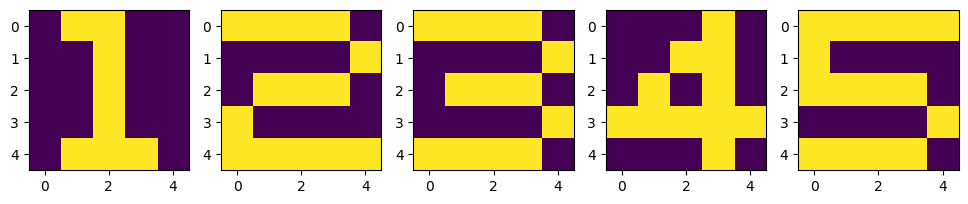

In [ ]:
# 데이터 준비
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]

# 정답지
D = np.array([[[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]])

plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

In [ ]:
D

array([[[1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 1]]])

In [ ]:
# relu : 음수는 모두 0으로 이외의 값은 해당 값으로 반환해줌
def ReLU(x):
    # np.maximum : 여러 array 사이에서 각 위치의 최대값 반환
    return np.maximum(0, x)


# 순방향 계산
def calc_output_relu(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [ ]:
# 역전파를 이용한 델타 계산
def backprop_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0)*e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0)*e1

    return delta, delta1, delta2, delta3

In [ ]:
# 델타를 이용한 가중치 업데이트 계산
def calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha*delta*y3.T
    W4 = W4 + dW4

    dW3 = alpha*delta3*y2.T
    W3 = W3 + dW3

    dW2 = alpha*delta2*y1.T
    W2 = W2 + dW2

    dW1 = alpha*delta1*x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [ ]:
# 가중치 업데이트
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d =D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calc_output_relu(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backprop_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [ ]:
# 학습
W1 = 2*np.random.random((20, 25)) -1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

alpha = 0.001
for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

<ipython-input-39-bd11918b0969>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# 검증
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v = np.matmul(W4, y3)
    y = softmax(v)

    return y

In [ ]:
# 결과
N= 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)
    print("Y = {} : ".format(k+1)) # 실제값
    print(np.argmax(y, axis=0)+1)  # 예측값
    print(y)
    print('--------------------')

Y = 1 : 
[1]
[[9.99953074e-01]
 [4.15220470e-05]
 [2.53246802e-07]
 [1.21079489e-08]
 [5.13820853e-06]]
--------------------
Y = 2 : 
[2]
[[1.77949560e-02]
 [9.79683860e-01]
 [2.50977043e-03]
 [2.79678778e-07]
 [1.11337927e-05]]
--------------------
Y = 3 : 
[1]
[[8.49051614e-01]
 [1.45977163e-01]
 [2.60544296e-03]
 [6.70101412e-04]
 [1.69567867e-03]]
--------------------
Y = 4 : 
[1]
[[9.79568838e-01]
 [2.02682150e-02]
 [1.52006312e-05]
 [1.47723490e-04]
 [2.32421902e-08]]
--------------------
Y = 5 : 
[1]
[[9.69593914e-01]
 [3.02345592e-02]
 [8.26846047e-05]
 [1.24992923e-05]
 [7.63430079e-05]]
--------------------


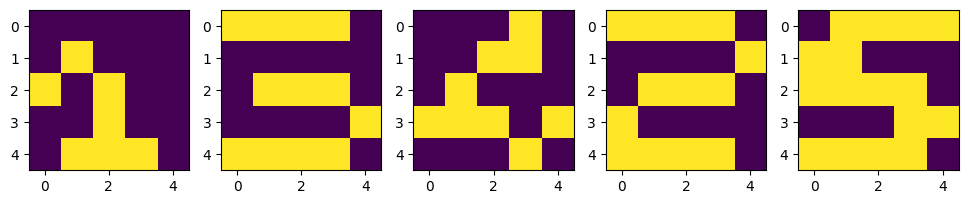

In [ ]:
# 테스트
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

plt.figure(figsize=(12, 4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:, :, n])
plt.show()

In [ ]:
# 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1)) # X의 k번째 값을 (25, 1) 사이즈로 변경하라는 의미입니다. 원래 (5, 5)의 2차원 행렬을 Flatten해서 1차원으로 펼치는 것으로 보이네요.
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1

    print("Y = {} : ".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('--------------------')

Y = 1 : 
[5]
[[4.27813421e-01]
 [2.72400341e-02]
 [2.36448968e-07]
 [2.43568811e-05]
 [5.44921952e-01]]
--------------------
Y = 2 : 
[1]
[[0.53173813]
 [0.46443665]
 [0.00133851]
 [0.00154269]
 [0.00094402]]
--------------------
Y = 3 : 
[1]
[[8.63420261e-01]
 [1.33913018e-01]
 [8.17858514e-04]
 [1.84828529e-03]
 [5.77458198e-07]]
--------------------
Y = 4 : 
[2]
[[1.01012493e-01]
 [8.88372091e-01]
 [1.05950593e-02]
 [9.09726187e-07]
 [1.94464369e-05]]
--------------------
Y = 5 : 
[1]
[[9.24331335e-01]
 [2.16580187e-02]
 [5.18231702e-02]
 [2.18731172e-03]
 [1.64058137e-07]]
--------------------


In [ ]:
learning_result

[array([5]), array([1]), array([1]), array([2]), array([1])]

In [ ]:
learning_result[0]

array([5])

In [ ]:
learning_result[0][0]

5

In [ ]:
learning_result[2][0]

1

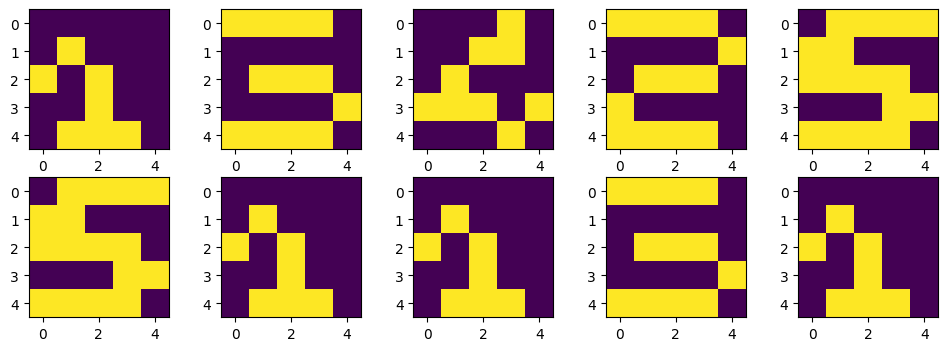

In [ ]:
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()

모델에 융통성을 기르게 해보자.

In [ ]:
y = np.array([0.1, 0.2, 0.5, 0.7, 0.9, 0.6, 1, 2, 3])
y.size, y.size*(1 - 0.8), round(y.size*(1 - 0.8))

(9, 1.7999999999999996, 2)

In [ ]:
num = round(y.size*(1 - 0.8))
np.random.choice(y.size, num, replace = True)

array([7, 8])

In [ ]:
# dropout 함수
def Dropout(y, ratio):
    ym = np.zeros_like(y)

    num = round(y.size * (1 - ratio))
    # y.size까지의 수 중 num 개수만큼 랜덤으로 추출
    idx = np.random.choice(y.size, num, replace = True)
    ym[idx] = 1.0 / (1.0 - ratio)

    return ym

# dropout 적용시킨 순방향 출력 계산
def calc_output_dropout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    y1 = y1 * Dropout(y1, 0.2)

    v2 = np.matmul(W2, y1)
    y2 = sigmoid(v2)
    y1 = y2 * Dropout(y2, 0.2)

    v3 = np.matmul(W3, y2)
    y3 = sigmoid(v3)
    y3 = y3 * Dropout(y3, 0.2)

    v = np.matmul(W4, y3)
    y = softmax(v)

    return y, y1, y2, y3, v1, v2, v3

In [ ]:
# 역전파를 이용한 델타 계산
def backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = y3*(1 - y3)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2*(1 - y2)*e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = y1*(1 - y1)*e1

    return delta, delta1, delta2, delta3


# 가중치 업데이트
def Deepdropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d =D[k, :].T

        y, y1, y2, y3, v1, v2, v3 = calc_output_dropout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backprop_dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calc_Ws(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [ ]:
# 학습
W1 = 2*np.random.random((20, 25)) -1
W2 = 2*np.random.random((20, 20)) - 1
W3 = 2*np.random.random((20, 20)) - 1
W4 = 2*np.random.random((5, 20)) - 1

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = Deepdropout(W1, W2, W3, W4, X, D)

<ipython-input-53-a52f4486456a>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(10000)):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# 테스트 데이터 다시 예측
learning_result = [0,0,0,0,0]

for k in range(N):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    learning_result[k] = np.argmax(y, axis = 0) + 1

    print("Y = {} : ".format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('--------------------')

Y = 1 : 
[1]
[[1.00000000e+00]
 [2.56002901e-14]
 [7.49681590e-13]
 [8.60120382e-12]
 [2.54452877e-12]]
--------------------
Y = 2 : 
[1]
[[1.00000000e+00]
 [5.04745632e-19]
 [2.56622997e-22]
 [1.98312994e-18]
 [4.21782240e-17]]
--------------------
Y = 3 : 
[1]
[[1.00000000e+00]
 [6.42277308e-13]
 [6.57491589e-13]
 [9.27787080e-13]
 [2.19081987e-13]]
--------------------
Y = 4 : 
[1]
[[1.00000000e+00]
 [2.63519065e-24]
 [1.03771364e-24]
 [5.88389441e-17]
 [6.52335425e-19]]
--------------------
Y = 5 : 
[1]
[[1.00000000e+00]
 [2.60959332e-23]
 [2.03844213e-26]
 [3.52263462e-24]
 [3.28463284e-21]]
--------------------


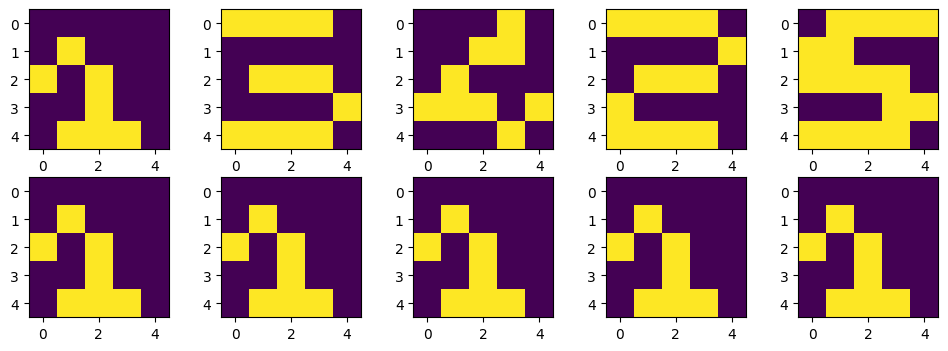

In [ ]:
plt.figure(figsize=(12, 4))
for k in range(5):
    plt.subplot(2, 5, k+1)
    plt.imshow(X_test[:, :, k]) # 원본 데이터

    plt.subplot(2, 5, k+6)
    plt.imshow(X_test[:, :, learning_result[k][0] - 1]) # 예측 데이터
plt.show()

예측한 결과가 거의 안 맞는다